<a href="https://colab.research.google.com/github/garg-aayush/Seismic-FDmodelling-Tutorial/blob/main/A_2-space_2-time_FD_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# load the required modules 

#NBVAL_IGNORE_OUTPUT
# Adding ignore due to (probably an np notebook magic) bug
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import cm
import numpy as np

%matplotlib inline

#### Helper plotting functions

In [12]:
#@title
# helper plotting functions

import numpy as np

def plot_velocity(model, x, z, si_units=True, source=None, receiver=None, figsize=(10,10), markersize=50, colorbar=True, cmap="jet") :
    """
    Plot the velocity model
    
    Parameters
    ----------
    model       : 2D array (nz,nx) containing the model
    x           : horizontal axis
    z           : vertical axis
    si_units    : bool (default: False)
    source      : Source point coordinates (array_like or float)
    receiver    : Source point coordinates (array_like or float)
    figsize     : tuple (default: (10,10)
    markersize  : scatter points size (default: 50)
    colorbar    : True or false
    cmap        : colormap (default: jet)
    
    Note: model,x,z,receiver and source should be in same units
    
    author   : Aayush Garg
    contact  : aayushgargiitr[At]gmail.com

    The code is taken from Devito example codes and modified to fit the purpose
    """
    

    if si_units:
        model = 1e-3 * model
        x = 1e-3 * x
        z = 1e-3 * z
        
        if receiver is not None:
            receiver = 1e-3 * receiver
        if source is not None:
            source = 1e-3 * source

        
    extent = [x[0], x[-1], z[-1], z[0]]
    
    fig = plt.figure(figsize=figsize)
    plot = plt.imshow(model, animated=True, cmap=cmap,
                      vmin=np.min(model), vmax=np.max(model),
                      extent=extent)
    plt.xlabel('X position (km)')
    plt.ylabel('Depth (km)')

    # Plot source points, if provided
    if receiver is not None:
        plt.scatter(receiver[0, :], receiver[1, :],
                    s=markersize, c='green', marker='D')

    # Plot receiver points, if provided
    if source is not None:
        plt.scatter(source[0, :], source[1, :],
                    s=markersize, c='red', marker='o')

    # Ensure axis limits
    plt.xlim(x[0], x[-1])
    plt.ylim(z[-1], z[0])
    
    # Create aligned colorbar on the right
    if colorbar:
        ax = plt.gca()
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(plot, cax=cax)
        cbar.set_label('Velocity (km/s)')
    plt.show()

def plot_shotrecord(rec, model, t0=0, dt=0.001, dx=10, perc=99, figsize=(10,10), colorbar=True):
    """ 
    Plot a shot record

    Parameters
    ----------
    rec     : shot gather, 2D array (nt, ng)
    dx      : horizontal spacing (in m)
    dt      : time sampling (in s)
    t0      : start time (in s)
    perc    : clipping percentile value (default: 99)
    figsize : tuple (default: (10,10)
    colorbar: True or False

    author   : Aayush Garg
    contact  : aayushgargiitr@gmail.com

    The code is taken from Devito example codes and modified to fit the purpose
    """
   
    scale = np.percentile(np.abs(rec), perc)
    nt, nx = rec.shape
    extent = [0, 1e-3*dx*(nx-1), t0 + dt*(nt-1), t0 ]

    fig = plt.figure(figsize=figsize)
    plot = plt.imshow(rec, vmin=-scale, vmax=scale, cmap=cm.gray, extent=extent)
    plt.xlabel('X position (km)')
    plt.ylabel('Time (s)')

    # Create aligned colorbar on the right
    if colorbar:
        ax = plt.gca()
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(plot, cax=cax)
    plt.show()

#### Define the model

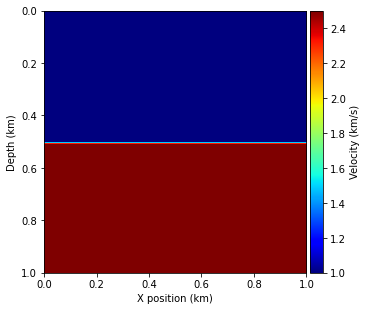

In [25]:
# Define the model parameters
nz, nx = (101, 101)
dx = 10
dz = 10

# x and z axis
x_ax = np.arange(0, nx*dx, dx)
z_ax = np.arange(0, nz*dz, dz)

# Define the velocity profile. The velocity is in m/s
vel = np.zeros((nz,nx))
vel[:51, :] = 1000
vel[51:, :] = 2500

# Q.C. the velocity model
plot_velocity(vel, x=x_ax, z=z_ax, si_units=True, figsize=(5,15), colorbar=True, cmap="jet")

In [27]:
dt = 0.001
t = 1
nt = round(t/dt) + 1

t_ax = np.arange(0,nt*dt, dt)


#src = =
#(np.pi * self.f0 * (self.time_values - t0))
#       return a * (1-2.*r**2)*np.exp(-r**2)
t_ax.shape
x_ax.shape

(101,)

#### Create a wavelet

## Loading Public Notebooks Directly from GitHub

Colab can load public github notebooks directly, with no required authorization step.

For example, consider the notebook at this address: https://github.com/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb.

The direct colab link to this notebook is: https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb.

To generate such links in one click, you can use the [Open in Colab](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo) Chrome extension.

## Browsing GitHub Repositories from Colab

Colab also supports special URLs that link directly to a GitHub browser for any user/organization, repository, or branch. For example:

- http://colab.research.google.com/github will give you a general github browser, where you can search for any github organization or username.
- http://colab.research.google.com/github/googlecolab/ will open the repository browser for the ``googlecolab`` organization. Replace ``googlecolab`` with any other github org or user to see their repositories.
- http://colab.research.google.com/github/googlecolab/colabtools/ will let you browse the main branch of the ``colabtools`` repository within the ``googlecolab`` organization. Substitute any user/org and repository to see its contents.
- http://colab.research.google.com/github/googlecolab/colabtools/blob/master will let you browse ``master`` branch of the ``colabtools`` repository within the ``googlecolab`` organization. (don't forget the ``blob`` here!) You can specify any valid branch for any valid repository.

## Loading Private Notebooks

Loading a notebook from a private GitHub repository is possible, but requires an additional step to allow Colab to access your files.
Do the following:

1. Navigate to http://colab.research.google.com/github.
2. Click the "Include Private Repos" checkbox.
3. In the popup window, sign-in to your Github account and authorize Colab to read the private files.
4. Your private repositories and notebooks will now be available via the github navigation pane.

## Saving Notebooks To GitHub or Drive

Any time you open a GitHub hosted notebook in Colab, it opens a new editable view of the notebook. You can run and modify the notebook without worrying about overwriting the source.

If you would like to save your changes from within Colab, you can use the File menu to save the modified notebook either to Google Drive or back to GitHub. Choose **File→Save a copy in Drive** or **File→Save a copy to GitHub** and follow the resulting prompts. To save a Colab notebook to GitHub requires giving Colab permission to push the commit to your repository.

## Open In Colab Badge

Anybody can open a copy of any github-hosted notebook within Colab. To make it easier to give people access to live views of GitHub-hosted notebooks,
colab provides a [shields.io](http://shields.io/)-style badge, which appears as follows:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

The markdown for the above badge is the following:

```markdown
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
```

The HTML equivalent is:

```HTML
<a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
```

Remember to replace the notebook URL in this template with the notebook you want to link to.